In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel


In [56]:
df=pd.read_csv("Data_musicgenres.csv")

In [57]:
df

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo,genre
0,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,949.558806,...,-0.189109,-0.110339,22.482096,-26.569305,-3.667368,6.422199,0.313302,-0.037197,123.046875,blues
1,5444.293577,421.091729,1529.835316,613.175361,4.028086,1.339397,8085.717773,333.764648,3548.820207,1725.249654,...,0.054884,0.154526,19.230034,-27.189579,-2.239120,8.055376,-0.182963,0.004210,107.666016,blues
2,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,884.938380,...,0.542265,-0.682770,23.078028,-28.854303,-8.905224,7.774160,0.489465,0.710559,161.499023,blues
3,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,1222.395194,...,1.569782,0.613722,20.651333,-32.890564,-2.476421,7.538023,0.499351,-0.163374,172.265625,blues
4,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,1253.915665,...,0.430401,0.456069,24.070387,-36.607307,-6.934123,9.466887,0.057030,0.132279,135.999178,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4493.780095,928.102055,2008.581132,531.170411,2.519661,1.284807,7902.685547,1894.921875,4254.215942,1105.793197,...,0.852138,-0.363397,14.997101,-39.472176,-12.306271,7.023474,0.660180,-0.229413,103.359375,rock
996,3688.282904,839.324247,2006.051164,425.986210,1.357878,0.418983,7396.655273,1550.390625,4147.374921,1021.011619,...,0.141132,-0.228163,4.551425,-32.575417,-16.394691,5.901891,0.152165,0.216026,117.453835,rock
997,4301.550281,875.713916,2077.190361,481.354227,3.716744,1.412356,7515.087891,2077.954102,4030.767293,896.814169,...,-0.041365,0.020217,5.410348,-35.505875,-17.951916,6.664895,-0.302291,0.179480,129.199219,rock
998,4051.652756,527.595405,1398.672358,490.415442,3.474900,1.424331,7568.920898,495.263672,3014.740104,1154.439515,...,-0.266915,-0.184866,12.216005,-35.016487,-10.071786,7.538150,-0.057326,-0.111676,112.347147,rock


Visualization:
Dimensionality reduction

In [7]:
df.corr()

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo
centroid_max,1.000000,0.123014,0.731945,0.847235,0.125641,0.185379,0.899234,0.085808,0.763007,0.669997,...,0.002129,-0.006964,-0.145709,0.116056,0.032494,0.193485,-0.017685,0.033974,-0.152891,-0.128402
centroid_min,0.123014,1.000000,0.589462,-0.230512,-0.065498,-0.107414,0.205249,0.964941,0.533963,-0.407034,...,-0.405671,-0.008969,-0.162732,-0.356962,-0.000617,-0.281248,-0.393007,0.031380,0.006524,-0.019909
centroid_mean,0.731945,0.589462,1.000000,0.543336,-0.208545,-0.278196,0.722191,0.557603,0.979633,0.230461,...,-0.234418,0.037301,-0.181124,-0.058288,0.074336,0.051260,-0.224407,0.061156,-0.107847,-0.104417
centroid_std,0.847235,-0.230512,0.543336,1.000000,-0.072267,0.035469,0.750197,-0.262646,0.583360,0.858888,...,0.134071,0.038251,-0.040817,0.280063,0.085107,0.355259,0.126585,0.050887,-0.164564,-0.106594
centroid_kurtosis,0.125641,-0.065498,-0.208545,-0.072267,1.000000,0.841375,0.086305,-0.063618,-0.210279,-0.005627,...,0.057456,-0.035899,-0.046433,-0.075711,-0.087178,-0.108759,0.001025,0.003917,0.007420,0.010384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mfcc_12_mean,0.193485,-0.281248,0.051260,0.355259,-0.108759,-0.066880,0.205285,-0.324102,0.081738,0.358877,...,0.222449,0.044980,0.136642,0.731193,0.648345,1.000000,0.254121,0.050623,0.033658,-0.038168
mfcc_12_std,-0.017685,-0.393007,-0.224407,0.126585,0.001025,0.022572,-0.155253,-0.393044,-0.233097,0.131323,...,0.813536,0.064691,0.250185,0.682186,-0.362663,0.254121,1.000000,0.058022,0.165441,-0.025120
mfcc_12_kurtosis,0.033974,0.031380,0.061156,0.050887,0.003917,0.009203,0.016836,0.021257,0.047387,0.013446,...,0.017319,0.444855,0.162459,0.353028,-0.127043,0.050623,0.058022,1.000000,0.373577,-0.036090
mfcc_12_skew,-0.152891,0.006524,-0.107847,-0.164564,0.007420,-0.006838,-0.145651,0.012524,-0.124865,-0.135524,...,0.105853,0.135726,0.139461,0.389271,0.220253,0.033658,0.165441,0.373577,1.000000,-0.035381


In [70]:
X = df.drop(['genre'], axis=1)
Y = df['genre']

scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

encoder = LabelEncoder()
Y_enc = encoder.fit_transform(Y)

PCA

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3,whiten=False);
pca.fit(X_scaled)

PCA(n_components=3)

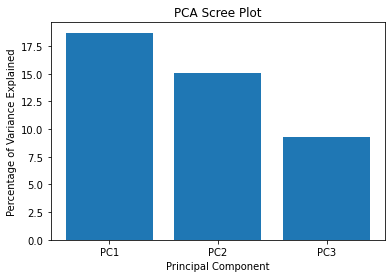

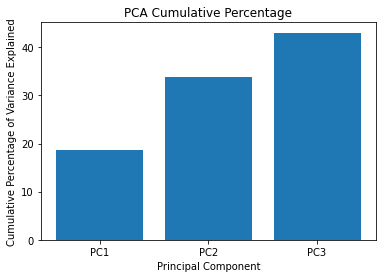

In [50]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = np.array(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
plt.figure(1)
plt.bar(columns[:pca.n_components], np.array(percent_variance[:pca.n_components]))
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

percent_cumulative_variance = np.cumsum(percent_variance)
plt.figure(2)
plt.bar(columns[:pca.n_components], np.array(percent_cumulative_variance[:pca.n_components]))
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Cumulative Percentage')
plt.show()

In [89]:
PCA = pca.transform(X_scaled)

KMEANS

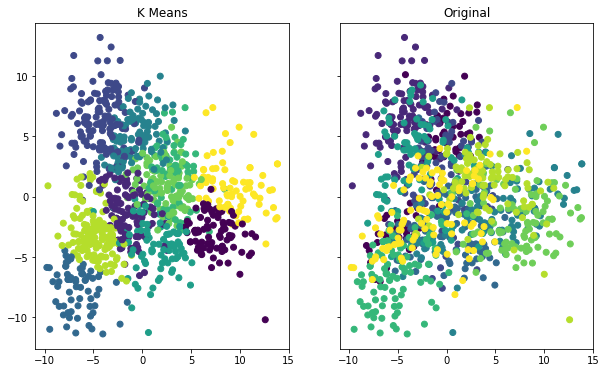

In [92]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10,random_state=42)
kmeans.fit(PCA)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(PCA[:,0], PCA[:,1], c=kmeans.labels_)
ax2.set_title("Original")
ax2.scatter(PCA[:,0], PCA[:,1], c=Y_enc)

In [61]:
def success(label,columns,sums):
    mostNum = np.amax(label)
    mostLb = label.index(mostNum)
    mostLabel = columns[mostLb]
    print("Most found label: " + mostLabel)
    print("Number of " + mostLabel + " found :" + str(mostNum))
    total = np.sum(label)
    print("Population of cluster: " + str(total))
    mostSum = sums[mostLb]
    mostAbility = round(100*mostNum/mostSum,1)
    print("Percentage of " + mostLabel + " found: " + str(mostAbility) + "%")  
    ability = round(100*mostNum/total, 1)
    print("Ability to distinguish " + mostLabel + " amoung other found genres in cluster: " + str(ability)+"%")

In [62]:
def compareLabels(clusterLabels,trueLabels,labelNum,columns,plot=1):
    score = 0
    sums = [0]*10
    for k in trueLabels:
        sums[k] +=1
    for i in range(labelNum):
        if i ==0:
            clusters = [clusterLabels.index[clusterLabels[0]==i].to_numpy()]
            label = [0]*10
            for x in clusters[i]:
                label[Y_enc[x]] += 1
            labels = [label]
        else:
            clusters.append(clusterLabels.index[clusterLabels[0]==i].to_numpy())
            label = [0]*10
            for x in clusters[i]:
                label[Y_enc[x]] += 1
            labels.append(label)
        if plot==1:
            plt.figure(figsize=(8, 4))
            plt.bar(columns,label)
            title = "Match for cluster label " + str(i)
            plt.title(title)
            plt.show()
            success(labels[i],columns,sums)
    return clusters,labels

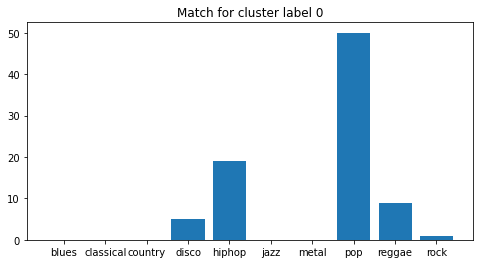

Most found label: pop
Number of pop found :50
Population of cluster: 84
Percentage of pop found: 50.0%
Ability to distinguish pop amoung other found genres in cluster: 59.5%


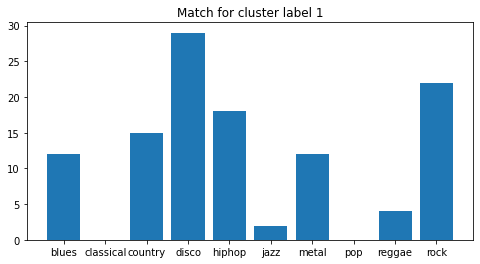

Most found label: disco
Number of disco found :29
Population of cluster: 114
Percentage of disco found: 29.0%
Ability to distinguish disco amoung other found genres in cluster: 25.4%


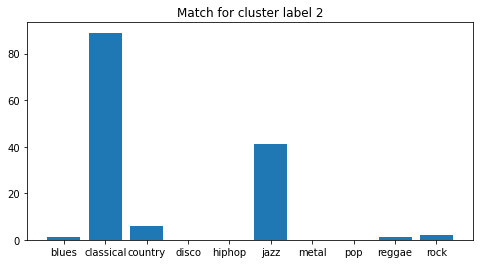

Most found label: classical
Number of classical found :89
Population of cluster: 140
Percentage of classical found: 89.0%
Ability to distinguish classical amoung other found genres in cluster: 63.6%


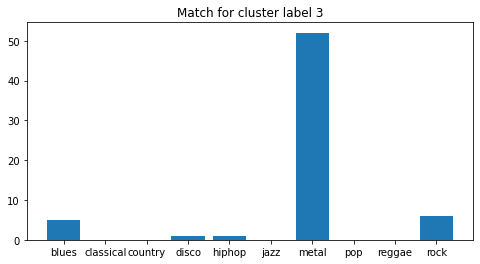

Most found label: metal
Number of metal found :52
Population of cluster: 65
Percentage of metal found: 52.0%
Ability to distinguish metal amoung other found genres in cluster: 80.0%


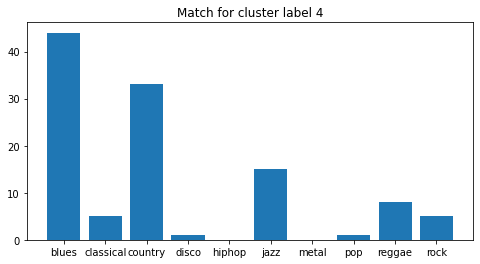

Most found label: blues
Number of blues found :44
Population of cluster: 112
Percentage of blues found: 44.0%
Ability to distinguish blues amoung other found genres in cluster: 39.3%


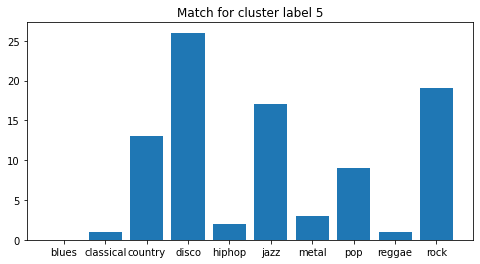

Most found label: disco
Number of disco found :26
Population of cluster: 91
Percentage of disco found: 26.0%
Ability to distinguish disco amoung other found genres in cluster: 28.6%


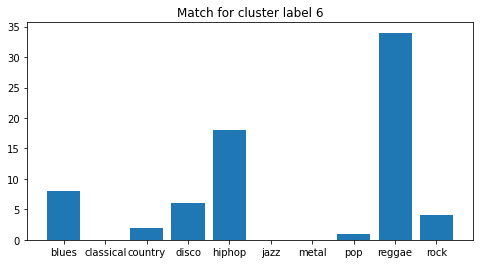

Most found label: reggae
Number of reggae found :34
Population of cluster: 73
Percentage of reggae found: 34.0%
Ability to distinguish reggae amoung other found genres in cluster: 46.6%


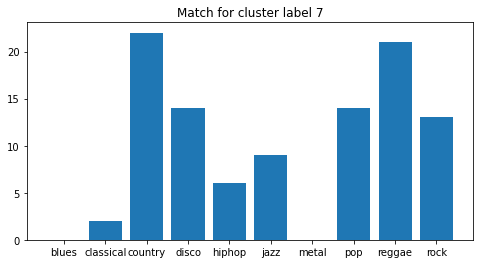

Most found label: country
Number of country found :22
Population of cluster: 101
Percentage of country found: 22.0%
Ability to distinguish country amoung other found genres in cluster: 21.8%


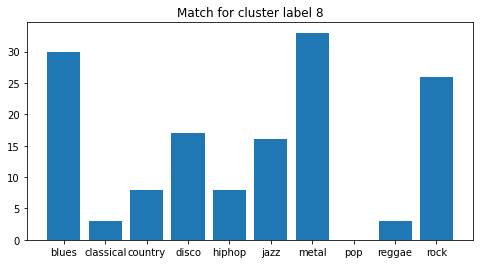

Most found label: metal
Number of metal found :33
Population of cluster: 144
Percentage of metal found: 33.0%
Ability to distinguish metal amoung other found genres in cluster: 22.9%


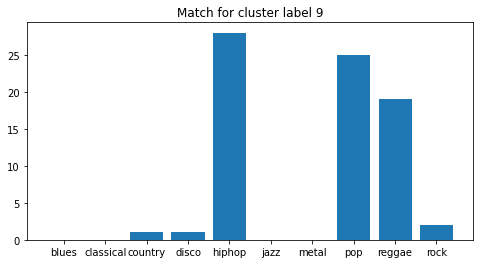

Most found label: hiphop
Number of hiphop found :28
Population of cluster: 76
Percentage of hiphop found: 28.0%
Ability to distinguish hiphop amoung other found genres in cluster: 36.8%


In [63]:
columns = Y.unique()
clusterLabels = pd.DataFrame(kmeans.labels_)
clusters,labels = compareLabels(clusterLabels,Y_enc,kmeans.n_clusters,columns)

In [64]:
from sklearn import metrics

metrics.adjusted_rand_score(Y_enc, kmeans.labels_)

0.21088541415443837

In [65]:
score = [0]*10

for i in range(1,10):
    pca = PCA(n_components=i,whiten=False)
    xPCA = pca.fit_transform(X_scaled)
    kmeans = KMeans(n_clusters=10,random_state=42)
    kmeans.fit(xPCA)
    score[i] = metrics.adjusted_rand_score(Y_enc, kmeans.labels_)

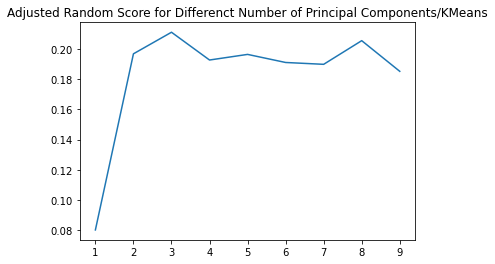

In [66]:
plt.plot(range(1,10),score[1:])
plt.title("Adjusted Random Score for Differenct Number of Principal Components/KMeans")
plt.show()

In [67]:
y = df['genre']
X = df.drop(columns=['genre'])

In [72]:
#Scale the data
scale = StandardScaler()
x_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

In [73]:
x_scaled.head()

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,tempo
0,-0.551119,0.327185,-0.583303,-1.020326,0.970654,0.943012,-0.272387,0.253342,-0.486166,-0.636384,...,-0.531473,-0.752266,-0.365011,0.019333,0.464418,0.183186,-0.900840,0.073169,-0.407109,0.098046
1,0.367633,-0.998428,-0.939066,-0.069368,0.610166,0.649882,-0.015867,-1.049596,-0.649869,0.930588,...,0.972199,-0.374373,0.426514,-0.292614,0.382568,0.414751,0.008729,-0.703958,-0.277323,-0.640715
2,-0.135998,-1.006822,-0.907419,-0.887331,2.852801,1.521889,-0.904303,-0.955859,-0.972811,-0.766924,...,-0.035540,0.380478,-2.075663,0.076496,0.162894,-0.666035,-0.147889,0.349031,1.936685,1.944950
3,-1.068013,-1.222383,-1.581483,-0.759871,-0.047903,0.151019,-0.291157,-1.002727,-1.516328,-0.085228,...,-0.653209,1.971888,1.798775,-0.156279,-0.369723,0.376277,-0.279401,0.364512,-0.802603,2.462083
4,-0.269697,-0.060928,-0.511931,-0.171694,-0.126968,0.222295,-0.597730,-0.337198,-0.629459,-0.021553,...,0.681089,0.207226,1.327645,0.171686,-0.860177,-0.346457,0.794846,-0.328141,0.124103,0.720161


In [74]:
#encode the genres
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

In [75]:
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [15]:
pca = PCA(n_components=5, whiten=True)
x_pca = pca.fit_transform(x_scaled)
print("cumulative explained variance ratio = {:.4f}".format(np.sum(pca.explained_variance_ratio_)))

cumulative explained variance ratio = 0.5114


In [76]:
# Use LDA only for visualization
lda = LDA()
x_lda = lda.fit_transform(x_scaled, y_enc)

In [77]:
x_lda.shape

(1000, 9)

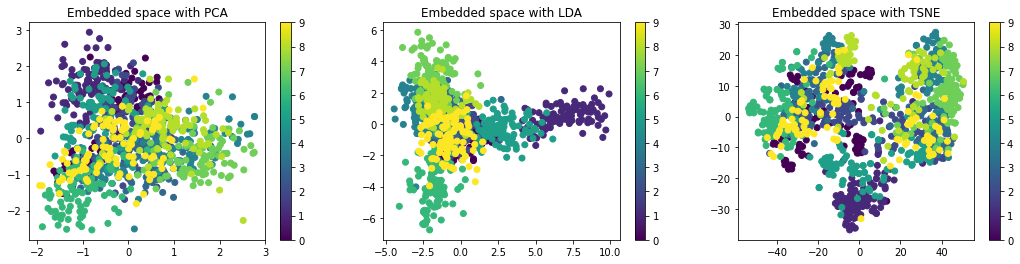

In [78]:
plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with PCA")

plt.subplot(132)
plt.scatter(x_lda[:,0], x_lda[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with LDA")

plt.subplot(133)
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y_enc)
plt.colorbar()
plt.title("Embedded space with TSNE")
plt.show()

In [79]:
#Prepare the data:
X_train, X_test, y_train, y_test = train_test_split(x_lda, y_enc, test_size=0.3, random_state=42)

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [29]:
##KMeans

In [82]:
#KMeans
model_ml = 'KMeans'
clf = KMeans(n_clusters=10, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
print('Accuracy for this model : '+model_ml+' is :'+str(Accuracy))

Accuracy for this model : KMeans is :0.15333333333333332


In [37]:
#KMeans
model_ml = 'KMeans'
clf = KMeans(n_clusters=10, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
print('Accuracy for this model : '+model_ml+' is :'+str(Accuracy))

Accuracy for this model : KMeans is :0.15333333333333332


In [83]:
X_train.shape

(700, 9)

In [84]:
Accuracy = accuracy_score(y_test, [np.argmax(y_pred[i]) for i in range(len(y_pred))])

In [85]:
Accuracy 

0.11666666666666667

In [86]:
nvb = GaussianNB()
nvb.fit(X_train,y_train)
y_pred=nvb.predict(X_test)
#AUC = roc_auc_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8766666666666667